In [1]:
!pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import psycopg2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = psycopg2.connect(
    dbname = 'salary_analysis_data_job_positions',
    user = 'postgres',
    password = 'Amir3525',
    host = 'localhost',
    port = '5432'
)

cur = conn.cursor()
print("Connected to the database")

Connected to the database


In [ ]:
cur.execute("SELECT * FROM salaries s LIMIT 10;")
rows = cur.fetchall()

for row in rows:
    print(rows)

# BASIC STATISTICS
### COUNTING TOTAL QUANTITY of DISTINCT job positions


In [ ]:
cur.execute("""
SELECT
	COUNT(DISTINCT s.job_title)
FROM
	salaries s
""")
rows = cur.fetchall()

for row in rows:
    print("The number of different job positions is: ",rows)

In [55]:
cur.execute("""
SELECT 
	s.job_title,
	COUNT(s.job_title)
FROM	
	salaries s
GROUP BY	
	s.job_title
ORDER BY 
	COUNT(s.job_title) DESC
LIMIT
	10;
""")
rows = cur.fetchall()

for row in rows:
    print(row)

('Data Scientist', 13156)
('Data Engineer', 10883)
('Software Engineer', 9596)
('Data Analyst', 8652)
('Machine Learning Engineer', 6443)
('Engineer', 5344)
('Manager', 3488)
('Research Scientist', 2553)
('Analyst', 2066)
('Applied Scientist', 1778)


### Ploting - Quantity of data job positions

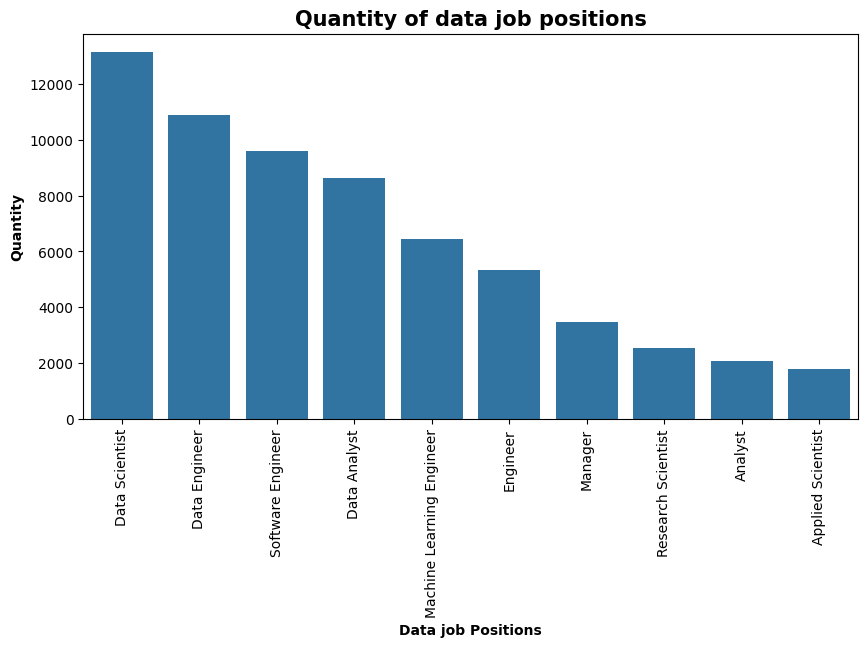

In [13]:
cur.execute("""
SELECT 
	s.job_title,
	COUNT(s.job_title) AS job_count
FROM	
	salaries s
GROUP BY	
	s.job_title
ORDER BY 
	COUNT(s.job_title) DESC
LIMIT
	10;
""")
rows = cur.fetchall()

# Defining the query as a Dataframe
top_10_data_jobs = pd.DataFrame(rows, columns = ['job_title', 'job_count'])

plt.figure(figsize=(10, 5))
sns.barplot(x = "job_title", y = "job_count", data = top_10_data_jobs)
plt.xticks(rotation = 90)
plt.ylabel("Quantity", weight="bold", size = 10)
plt.xlabel("Data job Positions", weight="bold", size = 10)
plt.title("Quantity of data job positions", weight="bold", size = 15.0)
plt.show()

## Career Choice & Job Trends

### 1. Best Roles (part-time) for Beginners


In [ ]:
cur.execute("""
SELECT 
	s.experience_level,
	s.job_title,
	s.employment_type,
	ROUND(AVG(s.salary_in_usd),2) AS average_salary
FROM	
	salaries s
WHERE
	s.experience_level = 'EN'
	AND s.employment_type = 'PT'
GROUP BY
	s.job_title,
	s.experience_level,
	s.employment_type
ORDER BY
	AVG(s.salary_in_usd) DESC
LIMIT 10;
""")
rows = cur.fetchall()

for row in rows:
    print(row)

### 1.2. Best Roles (full-time) for Beginners


In [ ]:
cur.execute("""
SELECT 
	s.experience_level,
	s.job_title,
	s.employment_type,
	ROUND(AVG(s.salary_in_usd),2) AS average_salary
FROM	
	salaries s
WHERE
	s.experience_level = 'EN'
GROUP BY
	s.job_title,
	s.experience_level,
	s.employment_type
ORDER BY
	AVG(s.salary_in_usd) DESC
LIMIT 10;

""")
rows = cur.fetchall()

for row in rows:
    print(row)

## 2. Remote, Hybrid, or In-Person Preferences

In [38]:
cur.execute("""
SELECT 
	COUNT(s.job_title) AS total_work_types,
	s.remote_ratio
FROM
	salaries s
GROUP BY
	s.remote_ratio
ORDER BY 
	COUNT(s.job_title) DESC
""")

rows = cur.fetchall()

for row in rows:
    print(row)

(69580, 0)
(18708, 100)
(296, 50)


## 2.2. Remote, Hybrid, or In-Person by company location
###  ONLINE

In [ ]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '100'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
""")

rows = cur.fetchall()

for row in rows:
    print(row)

## 2.3. Remote, Hybrid, or In-Person by company location
###  HYBRID

In [ ]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '50'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
LIMIT 10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

## 2.4. Remote, Hybrid, or In-Person by company location
###  IN-PERSON

In [ ]:
cur.execute("""
SELECT 
    COUNT(job_title ) AS total_work_types,
    s.company_location,
    s.remote_ratio    
FROM
    salaries s
WHERE
	s.remote_ratio = '0'
GROUP BY
    s.remote_ratio,
    s.company_location
ORDER BY 
    total_work_types DESC
LIMIT 10
""")

rows = cur.fetchall()

for row in rows:
    print(row)

## 3. Career Growth Potential

In [ ]:
cur.execute("""
SELECT
	s.experience_level, 
	ROUND(AVG(s.salary_in_usd),2) AS average_salary,
	s.work_year
FROM
	salaries s
GROUP BY
	s.work_year,
	s.experience_level
ORDER BY
	s.work_year,
	CASE 
        WHEN s.experience_level = 'EN' THEN 1
        WHEN s.experience_level = 'MI' THEN 2
        WHEN s.experience_level = 'SE' THEN 3
        WHEN s.experience_level = 'EX' THEN 4
    END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)

## 3.2. Career Growth Potential
### Data Scientists

In [ ]:
cur.execute("""
SELECT
	s.experience_level, 
	ROUND(AVG(s.salary_in_usd),2) AS average_salary,
	s.work_year
FROM
	salaries s
WHERE
	s.job_title = 'Data Scientist'
GROUP BY
	s.work_year,
	s.experience_level
ORDER BY
	s.work_year,
	CASE 
        WHEN s.experience_level = 'EN' THEN 1
        WHEN s.experience_level = 'MI' THEN 2
        WHEN s.experience_level = 'SE' THEN 3
        WHEN s.experience_level = 'EX' THEN 4
    END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)

## 4. Comparing earnings across employment type and the most common employment type.

In [ ]:
cur.execute("""
SELECT
	s.employment_type,
	COUNT(s.employment_type) AS total_jobs_types,
	AVG(s.salary_in_usd) AS avg_salary_job_type
FROM
	salaries s
GROUP BY
	s.employment_type
ORDER BY
	CASE 
        WHEN s.employment_type = 'PT' THEN 1
        WHEN s.employment_type = 'FT' THEN 2
        WHEN s.employment_type = 'CT' THEN 3
        WHEN s.employment_type = 'FL' THEN 4
	END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)

## 4.2. Comparing earnings across employment_type and the most common employment type.
### Data Scientists

In [ ]:
cur.execute("""
SELECT
	s.employment_type,
	COUNT(s.employment_type) AS total_jobs_types,
	ROUND(AVG(s.salary_in_usd),2) AS avg_salary_job_type
FROM
	salaries s
WHERE 
	s.job_title = 'Data Scientist'
GROUP BY
	s.employment_type
ORDER BY
	CASE 
        WHEN s.employment_type = 'PT' THEN 1
        WHEN s.employment_type = 'FT' THEN 2
        WHEN s.employment_type = 'CT' THEN 3
        WHEN s.employment_type = 'FL' THEN 4
	END;
""")

rows = cur.fetchall()

for row in rows:
    print(row)

In [46]:
cur.close()
conn.close()
print("Connection closed")

Connection closed
